In [1]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\input_layer_4_6_9_4.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\output_layer_4_6_9_4.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150, input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 100, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/100
100000/100000 - 2s - loss: 0.2657 - accuracy: 0.8938 - val_loss: 0.2296 - val_accuracy: 0.9053
Epoch 2/100
100000/100000 - 1s - loss: 0.2040 - accuracy: 0.9124 - val_loss: 0.1786 - val_accuracy: 0.9196
Epoch 3/100
100000/100000 - 1s - loss: 0.1579 - accuracy: 0.9283 - val_loss: 0.1414 - val_accuracy: 0.9371
Epoch 4/100
100000/100000 - 1s - loss: 0.1275 - accuracy: 0.9427 - val_loss: 0.1197 - val_accuracy: 0.9473
Epoch 5/100
100000/100000 - 1s - loss: 0.1100 - accuracy: 0.9518 - val_loss: 0.1043 - val_accuracy: 0.9553
Epoch 6/100
100000/100000 - 1s - loss: 0.0955 - accuracy: 0.9591 - val_loss: 0.0952 - val_accuracy: 0.9586
Epoch 7/100
100000/100000 - 1s - loss: 0.0840 - accuracy: 0.9646 - val_loss: 0.0844 - val_accuracy: 0.9641
Epoch 8/100
100000/100000 - 1s - loss: 0.0760 - accuracy: 0.9685 - val_loss: 0.0766 - val_accuracy: 0.9681
Epoch 9/100
100000/100000 - 1s - loss: 0.0676 - accuracy: 0.9723 - val_loss: 0.0698 - val_accu

Epoch 77/100
100000/100000 - 1s - loss: 0.0093 - accuracy: 0.9967 - val_loss: 0.0236 - val_accuracy: 0.9932
Epoch 78/100
100000/100000 - 1s - loss: 0.0069 - accuracy: 0.9976 - val_loss: 0.0215 - val_accuracy: 0.9936
Epoch 79/100
100000/100000 - 1s - loss: 0.0055 - accuracy: 0.9981 - val_loss: 0.0200 - val_accuracy: 0.9941
Epoch 80/100
100000/100000 - 1s - loss: 0.0054 - accuracy: 0.9981 - val_loss: 0.0211 - val_accuracy: 0.9936
Epoch 81/100
100000/100000 - 1s - loss: 0.0059 - accuracy: 0.9979 - val_loss: 0.0253 - val_accuracy: 0.9925
Epoch 82/100
100000/100000 - 1s - loss: 0.0089 - accuracy: 0.9969 - val_loss: 0.0260 - val_accuracy: 0.9928
Epoch 83/100
100000/100000 - 1s - loss: 0.0104 - accuracy: 0.9966 - val_loss: 0.0295 - val_accuracy: 0.9921
Epoch 84/100
100000/100000 - 1s - loss: 0.0081 - accuracy: 0.9972 - val_loss: 0.0241 - val_accuracy: 0.9928
Epoch 85/100
100000/100000 - 1s - loss: 0.0071 - accuracy: 0.9975 - val_loss: 0.0214 - val_accuracy: 0.9938
Epoch 86/100
100000/100000 -

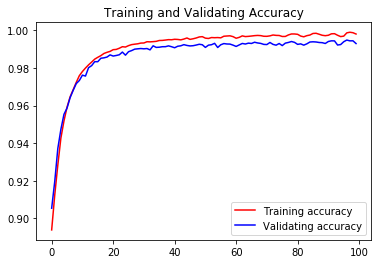

In [6]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [7]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Look_ahead_N\\Look_ahead_N_4_6_9_4_model.h5')